In [1]:
import numpy as np
import torch
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping 
import cmath
from torch import nn
import random
from torch.utils import data
import copy

In [2]:
class generator_t:
    def __init__(self,df,mu = 0, sigma = 1,samplesize = 1000, h = 0.01):
        self.df = df
        self.mu = mu
        self.sigma = sigma
        self.samplesize = samplesize
        self.frequency = h
    @staticmethod
    def cumulate(delta):
        data = torch.zeros(np.shape(delta))
        n = np.shape(delta)[0]
        for i in range(n-1):
            data[i+1] = data[i]+delta[i]
        return np.array(data)
    
    def generate_standard_t(self):
        d0 = np.random.standard_t(self.df, (self.samplesize,1))
        d1 = self.cumulate(d0)
        delta = torch.tensor(d0)
        data = torch.tensor(d1)
        delta.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
        return delta,data

In [3]:
class Characteristic_function:
    def __init__(self,data):
        self.data = data   
    def ecf(self,t):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            return c,s                
        else:    
            m = len(t)
            R = []
            for j in range(m):
                S = []
                C = []
                for i in range(n):
                    C = C+[math.cos(t[j]*self.data[i])]
                    S = S+[math.sin(t[j]*self.data[i])]
                #S = torch.tensor(S,dtype = torch.float64)
                #C = torch.tensor(C,dtype = torch.float64)
                s = sum(S)/len(S)
                c = sum(C)/len(C)
                R = R+[c]
                R = R+[s]
            #R = torch.tensor(R,dtype = torch.float64)
        return R

In [111]:
def net_2(X):
    X_clone = X.clone()
    X = X.reshape((-1, num_feature))
    H1 = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    H2 = relu(H1@W2 + b2)
    V = (H2@W3 + b3)
    return V

In [2]:
class Characteristic_function:
    def __init__(self,data):
        self.data = data   
    def ecf(self,t):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            return c,s                
        else:    
            m = len(t)
            R = []
            for j in range(m):
                S = []
                C = []
                for i in range(n):
                    C.append(math.cos(t[j]*self.data[i]))
                    S.append(math.sin(t[j]*self.data[i]))
                S = torch.tensor(S,dtype = torch.float64)
                C = torch.tensor(C,dtype = torch.float64)
                s = float(torch.mean(S))
                c = float(torch.mean(C))
                R.append(c)
                R.append(s)
            R = torch.tensor(R,dtype = torch.float64)
        return R
    def ecf_h(self,t,h):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            f = complex(c,s)
            q,w = cmath.polar(f)
            q = q**h
            w = w*h
            c = math.cos(w)*q
            s = math.sin(w)*q
            return c,s                
        else:    
            m = len(t)
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            R = torch.zeros((m,2))
            for j in range(m):
                for i in range(n):
                    C[i] = math.cos(t[j]*self.data[i])
                    S[i] = math.sin(t[j]*self.data[i])
                s = torch.mean(S)
                c = torch.mean(C)
                f = complex(c,s)
                q,w = cmath.polar(f)
                q = q**h
                w = w*h
                c = math.cos(w)*q
                s = math.sin(w)*q
                R[j,0] = c
                R[j,1] = s
        return R


In [51]:
num_feature = 200
range_feature = 20
num_t = 50
range_t = 15
num_labels = num_t
num_sample = 15
total = num_sample*num_feature
t = torch.linspace(-range_t,range_t,num_t,dtype = torch.float64)
#t = t.reshape((-1,len(t)))
x = torch.linspace(-range_feature,range_feature,num_feature,dtype = torch.float64)

In [52]:
#实例化(V =3)
Gen3 = generator_t(3,samplesize =total)

delta,path = Gen3.generate_standard_t()
Chf = Characteristic_function(delta)

In [53]:
a = []
features = []
label = []
for i in range(num_sample):
    delta,path = Gen3.generate_standard_t()
    Chf = Characteristic_function(delta)
    labels = Chf.ecf(t)
    label+=labels
    features+=x


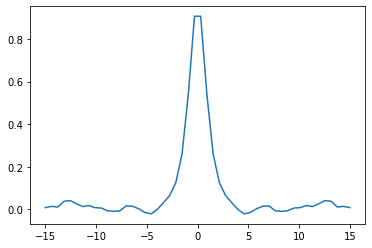

In [102]:
real = real[0:50]
plt.plot(t,real)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


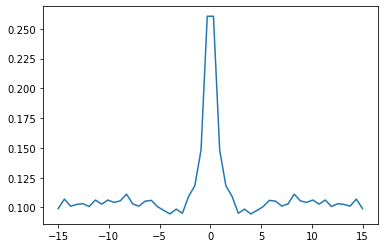

In [130]:
predict0 = list(net_1(features[0]))
real_h = torch.zeros(int(len(labels[0])/2)+1)
image_h = torch.zeros(int(len(labels[0])/2)+1)
for i in range(len(labels[0])):
    if i%2 ==0:
        real_h[int(i/2)] = predict0[0][i]
    else:
        image_h[int((i+1)/2)] = predict0[0][i]
real_h = real_h[0:50]        
plt.plot(t,real_h.detach().numpy())

In [99]:

labels[0]

real = torch.zeros(int(len(labels[0])/2)+1)
image = torch.zeros(int(len(labels[0])/2)+1)
for i in range(len(labels[0])):
    if i%2 ==0:
        real[int(i/2)] = labels[0][i]
    else:
        image[int((i+1)/2)] = labels[0][i]
        


In [117]:
predict0 = list(net_1(features[0]))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


In [125]:
(list(real_h))

[tensor(0.0990, grad_fn=<UnbindBackward0>),
 tensor(0.1070, grad_fn=<UnbindBackward0>),
 tensor(0.1011, grad_fn=<UnbindBackward0>),
 tensor(0.1026, grad_fn=<UnbindBackward0>),
 tensor(0.1031, grad_fn=<UnbindBackward0>),
 tensor(0.1008, grad_fn=<UnbindBackward0>),
 tensor(0.1063, grad_fn=<UnbindBackward0>),
 tensor(0.1028, grad_fn=<UnbindBackward0>),
 tensor(0.1063, grad_fn=<UnbindBackward0>),
 tensor(0.1042, grad_fn=<UnbindBackward0>),
 tensor(0.1056, grad_fn=<UnbindBackward0>),
 tensor(0.1112, grad_fn=<UnbindBackward0>),
 tensor(0.1030, grad_fn=<UnbindBackward0>),
 tensor(0.1011, grad_fn=<UnbindBackward0>),
 tensor(0.1053, grad_fn=<UnbindBackward0>),
 tensor(0.1060, grad_fn=<UnbindBackward0>),
 tensor(0.1007, grad_fn=<UnbindBackward0>),
 tensor(0.0975, grad_fn=<UnbindBackward0>),
 tensor(0.0946, grad_fn=<UnbindBackward0>),
 tensor(0.0986, grad_fn=<UnbindBackward0>),
 tensor(0.0951, grad_fn=<UnbindBackward0>),
 tensor(0.1093, grad_fn=<UnbindBackward0>),
 tensor(0.1183, grad_fn=<UnbindB

In [121]:
labels = torch.tensor(label,dtype = torch.float64).reshape((-1,2*num_labels))
features = torch.tensor(features,dtype = torch.float64).reshape((-1,num_feature))
features

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\4150703597.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features = torch.tensor(features,dtype = torch.float64).reshape((-1,num_feature))


tensor([[-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        ...,
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000]],
       dtype=torch.float64)

for i in range(num_sample):
    delta,path = Gen3.generate_standard_t()
    Chf = Characteristic_function(delta)
    labels = Chf.ecf(t)#.reshape((1,-1))
    a.append([x.reshape((-1,len(x))),labels])
    features.append(x.reshape((-1,len(x))))
    label.append(labels)

In [55]:
features

tensor([[-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        ...,
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000]],
       dtype=torch.float64)

In [56]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 1
D_loader = load_array((features,labels), batch_size)

In [57]:
next(iter(D_loader)) 

[tensor([[-20.0000, -19.7990, -19.5980, -19.3970, -19.1960, -18.9950, -18.7940,
          -18.5930, -18.3920, -18.1910, -17.9899, -17.7889, -17.5879, -17.3869,
          -17.1859, -16.9849, -16.7839, -16.5829, -16.3819, -16.1809, -15.9799,
          -15.7789, -15.5779, -15.3769, -15.1759, -14.9749, -14.7739, -14.5729,
          -14.3719, -14.1709, -13.9698, -13.7688, -13.5678, -13.3668, -13.1658,
          -12.9648, -12.7638, -12.5628, -12.3618, -12.1608, -11.9598, -11.7588,
          -11.5578, -11.3568, -11.1558, -10.9548, -10.7538, -10.5528, -10.3518,
          -10.1508,  -9.9497,  -9.7487,  -9.5477,  -9.3467,  -9.1457,  -8.9447,
           -8.7437,  -8.5427,  -8.3417,  -8.1407,  -7.9397,  -7.7387,  -7.5377,
           -7.3367,  -7.1357,  -6.9347,  -6.7337,  -6.5327,  -6.3317,  -6.1307,
           -5.9296,  -5.7286,  -5.5276,  -5.3266,  -5.1256,  -4.9246,  -4.7236,
           -4.5226,  -4.3216,  -4.1206,  -3.9196,  -3.7186,  -3.5176,  -3.3166,
           -3.1156,  -2.9146,  -2.7136, 

In [58]:
# 初始化参数定义


hidden_2, hidden_3 = 256, 256

W1 = nn.Parameter(torch.randn(
    num_feature, hidden_2, requires_grad=True,dtype = torch.float64) * 0.01)
b1 = nn.Parameter(torch.zeros(hidden_2, requires_grad=True,dtype = torch.float64))

W2 = nn.Parameter(torch.randn(
    hidden_2, hidden_3, requires_grad=True,dtype = torch.float64) * 0.01)
b2 = nn.Parameter(torch.zeros(hidden_3, requires_grad=True,dtype = torch.float64))

W3 = nn.Parameter(torch.randn(
    hidden_3, num_feature, requires_grad=True,dtype = torch.float64) * 0.01)
b3 = nn.Parameter(torch.zeros(num_feature, requires_grad=True,dtype = torch.float64))


params = [W1, b1, W2, b2, W3, b3]

In [59]:
#激活函数
def relu(X):
    a = torch.zeros_like(X)
    b = torch.max(X, a)
    return torch.tensor(b,dtype = torch.float64)

In [60]:
features.reshape((-1, num_feature))

tensor([[-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        ...,
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000]],
       dtype=torch.float64)

In [61]:
def expcostx(x,V):
    a = t.reshape((-1,1))@x.reshape((1,-1))
    b = (torch.cos(a)-1)@V.reshape((-1,1))
    c = torch.exp((range_feature*2/num_feature)*b)
    return c
def I(x):
    y = copy.deepcopy(x)
    y[abs(x)>1]=0
    return y
    
def realtx(x,V):
    a1 = torch.sin(t.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = t.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.cos(a5)
    return a6
def imagetx(x,V):
    a1 = torch.sin(t.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = t.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.sin(a5)
    return a6

In [62]:
def net_1(X):
    X_clone = X.clone()
    X = X.reshape((-1, num_feature))
    H1 = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    H2 = relu(H1@W2 + b2)
    V = (H2@W3 + b3)
    R_1 = expcostx(X,V)*realtx(x,V)
    R_2 = expcostx(X,V)*imagetx(x,V)
    R = torch.cat((R_1,R_2),1).reshape((1,-1))
    return R


In [63]:
H0 =  features[0].reshape((-1, num_feature))
H1 = relu(H0@W1 + b1)
H2 = relu(H1@W2 + b2)
V = (H2@W3 + b3)
a = t.reshape((-1,1))@features[0].reshape((-1,num_feature))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


In [64]:
loss = nn.MSELoss()

In [65]:
loss(net_1(features[0]),labels[0])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)
E:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.4993, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [66]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [71]:
lr = 0.03
num_epochs = int(num_sample/batch_size)
net = net_1
loss = nn.MSELoss()

trainer = torch.optim.SGD(params, lr=0.03)

In [72]:
for epoch in range(num_epochs):
    for X, y in D_loader:
        l = loss(net_1(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(X), y)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.020536
epoch 2, loss 0.018947
epoch 3, loss 0.019356
epoch 4, loss 0.019778
epoch 5, loss 0.018816
epoch 6, loss 0.019331
epoch 7, loss 0.018351
epoch 8, loss 0.018717
epoch 9, loss 0.018954
epoch 10, loss 0.017492
epoch 11, loss 0.017303
epoch 12, loss 0.017390
epoch 13, loss 0.017122
epoch 14, loss 0.015595
epoch 15, loss 0.014857


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


In [106]:
t1 = [1,2]

t2 = [3,4]
t3 = t1+t2+t1+t2

torch.tensor(t3).reshape((2,-1))[0][3]


tensor([1, 2, 3, 4, 1, 2, 3, 4])